Importaciones

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
original = cv2.imread('img/aurora.png')

In [10]:
# Mostrar imagenes de cv2 con plt
def display(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()



# Imagen original

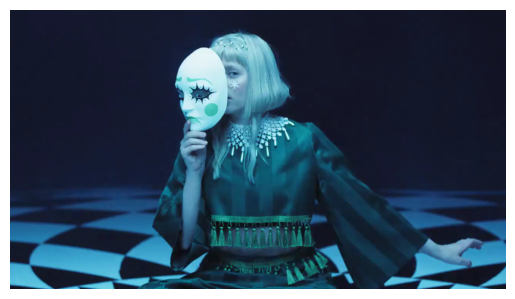

In [11]:
display(original)

# Aplicación de filtros

## Escala de grises

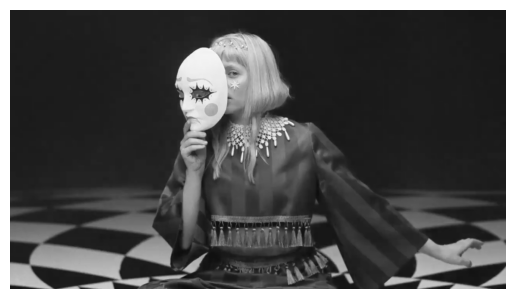

In [30]:
blackwhite = cv2.cvtColor(original, cv2.COLOR_RGB2GRAY)
display(blackwhite)

## Blur

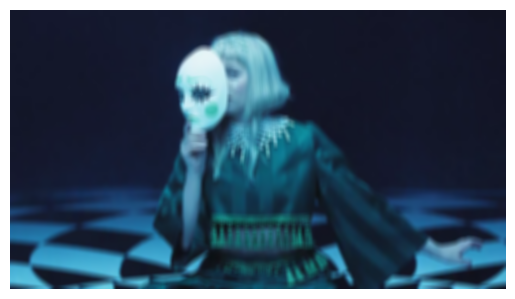

In [12]:
blurred = cv2.blur(original, (10,20))
display(blurred)

## Cambio tono de color

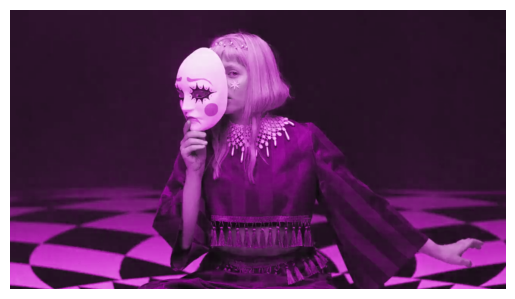

In [40]:

hsv_img = cv2.cvtColor(original, cv2.COLOR_BGR2HSV)  # Convertir a HSV para mayor facilidad

# Definir el valor del tono rosáceo (entre 140-170)
hue_shift = 150
hsv_img[:, :, 0] = hue_shift  # Ajustar el tono de toda la imagen

rose = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2BGR) # Regresar a color BGR
display(rose)


## Sharpened (enfocar)

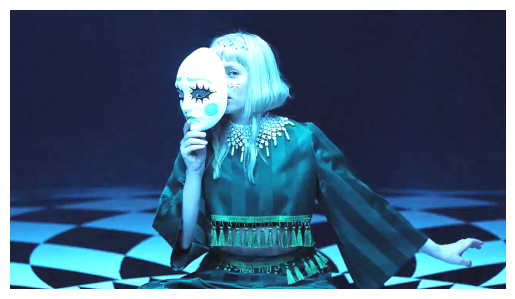

In [26]:
sharpened = cv2.filter2D(original, -1, np.array([[0, -2, 0], [-1, 6.5, -1], [0, -1, 0]]))
display(sharpened)

# Detección de bordes

In [ ]:
''' 1. Filtro Sobel en X y Y (detección de bordes) '''
sobel_x = cv2.Sobel(original, cv2.CV_64F, 1, 0, ksize=3)  # Sobel en X
sobel_y = cv2.Sobel(original, cv2.CV_64F, 0, 1, ksize=3)  # Sobel en Y

# Magnitud del gradiente (combinación de los bordes de X y Y)
sobel_magnitude = cv2.magnitude(sobel_x, sobel_y)
sobel_magnitude = np.uint8(np.absolute(sobel_magnitude))

''' 2. Filtro Laplaciano (detección de bordes) '''
laplacian = cv2.Laplacian(original, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))

# Mostrar los resultados de los filtros
cv2.imshow('Sobel Edge Detection', sobel_magnitude)
cv2.imshow('Laplacian Edge Detection', laplacian)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Comparación de los filtros:

Filtro de Sobel:


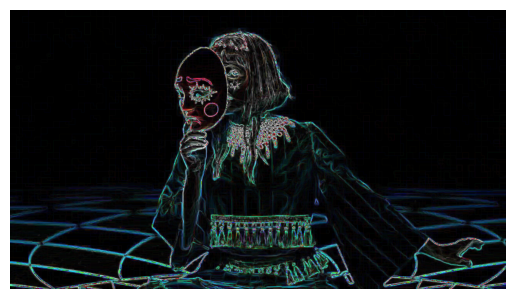

Filtro Laplaciano:


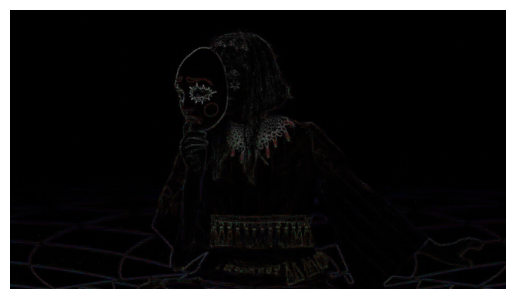

In [48]:
print("Filtro de Sobel:")
display(sobel_magnitude)

print("Filtro Laplaciano:")
display(laplacian)

# Exportar imágenes

In [52]:
cv2.imwrite('img/blackwhite.jpg', blackwhite)
cv2.imwrite('img/blurred.jpg', blurred)
cv2.imwrite('img/rose.jpg', rose)
cv2.imwrite('img/sharpened.jpg', sharpened)
cv2.imwrite('img/sobel.jpg', sobel_magnitude)
cv2.imwrite('img/laplacian.jpg', laplacian)

True